# Table Booking and Online Delivery

In [2]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

### convert 'Yes'/'No' to 1/0 before analysis

In [3]:
# Make sure columns are numeric: 1 for Yes, 0 for No
yes_no_cols = ['Has Table booking', 'Has Online delivery', 
               'Is delivering now', 'Switch to order menu']

## Percentage of restaurants offering table booking & online delivery

In [4]:
total_restaurants = len(df)
for col in yes_no_cols:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Percentage with table booking
table_booking_count = df['Has Table booking'].sum()
table_booking_pct = (table_booking_count / total_restaurants) * 100
print(f"\nPercentage of restaurants offering table booking: {table_booking_pct:.2f}%")

# Percentage with online delivery
online_delivery_count = df['Has Online delivery'].sum()
online_delivery_pct = (online_delivery_count / total_restaurants) * 100
print(f"Percentage of restaurants offering online delivery: {online_delivery_pct:.2f}%")


Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


## Compare average ratings: with vs without table booking

In [5]:
rated_df = df[df['Aggregate rating'] > 0]
# Average ratings for restaurants with table booking
avg_rating_with = df[df['Has Table booking']==1]['Aggregate rating'].mean()

# Average ratings for restaurants without table booking
avg_rating_without = df[df['Has Table booking']==0]['Aggregate rating'].mean()

print(f"\nAverage rating (with table booking): {avg_rating_with:.2f}")
print(f"Average rating (without table booking): {avg_rating_without:.2f}")


Average rating (with table booking): 3.44
Average rating (without table booking): 2.56


### Plot

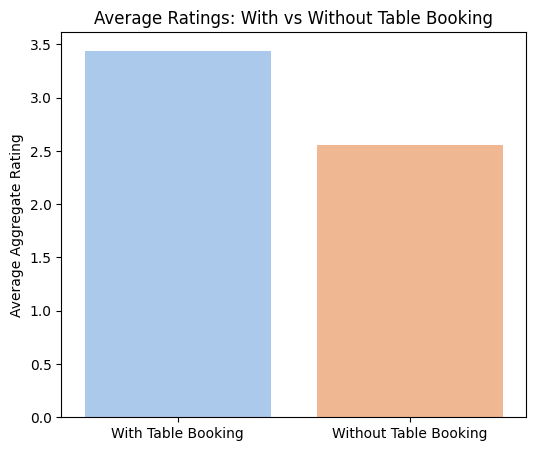

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.barplot(x=['With Table Booking', 'Without Table Booking'],
            y=[avg_rating_with, avg_rating_without],
            hue=['With Table Booking', 'Without Table Booking'],
            palette='pastel',
           legend = False )
plt.title('Average Ratings: With vs Without Table Booking')
plt.ylabel('Average Aggregate Rating')
plt.show()


## Analyze availability of online delivery across price ranges

In [7]:
price_online = df.groupby('Price range')['Has Online delivery'].mean() * 100
print("\nPercentage of restaurants offering online delivery by price range:")
display(price_online)


Percentage of restaurants offering online delivery by price range:


Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64

### Plot

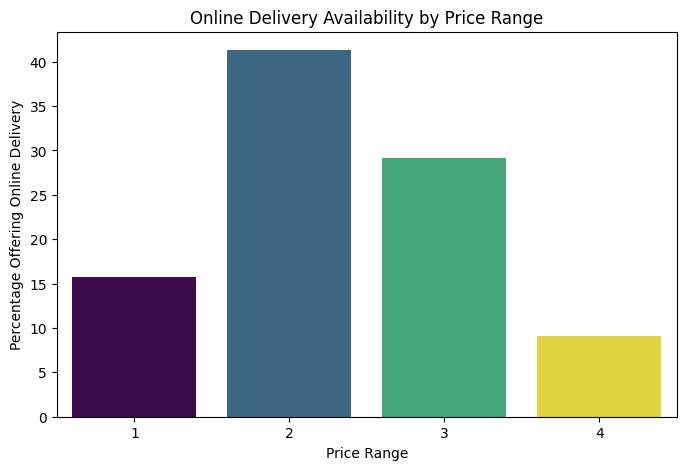

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x=price_online.index, y=price_online.values, hue=price_online.index, palette='viridis', legend = False)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage Offering Online Delivery')
plt.show()